In [30]:
# Lets Import the Neccessary Library
import os
import torch
import torchvision
from torch import nn
import numpy as np
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import random_split
import torchvision.models as models
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
os.listdir("flowers")
for cls in os.listdir("flowers"):
    print(cls, ':', len(os.listdir("flowers" + '/' + cls)))
dataset_path=Path("flowers")





cpu
daisy : 764
dandelion : 1052
rose : 784
sunflower : 733
tulip : 984


In [ ]:
image_paths = []
labels = []
class_names = os.listdir(dataset_path) # Get class (folder) names
class_to_idx = {class_name: i for i, class_name in enumerate(class_names)} # Assign index to each class

for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir): # Ensure it's a directory
        for img_file in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, img_file))
            labels.append(class_to_idx[class_name])  # Assign label

# Splitting dataset using sklearn train_test_split
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels)




Random image path: flowers\dandelion\151385302_f8980a257f_n.jpg
Image class: dandelion
Image height: 240
Image width: 320


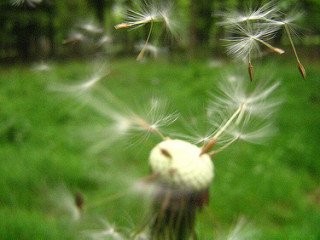

In [ ]:
import random
from PIL import Image
random.seed(42)

#Getting random image path
random_image_path = Path(random.choice(image_paths))

#Getting image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

#Opening image
img = Image.open(random_image_path)

#Printing the data
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [33]:
# The transformations to be applied
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),  # Convert images to tensors
])

In [ ]:
#Creating a custom dataset
class FlowerDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        # Open image
        image = Image.open(img_path).convert("RGB")

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, label

# Creating train and test datasets
train_data = FlowerDataset(train_paths, train_labels, transform=transform)
test_data = FlowerDataset(test_paths, test_labels, transform=transform)
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Test data:


In [35]:
print(len(train_data))

3453


In [36]:
print(train_data)

In [ ]:
#Checking the shape,type and size of the data(getting to know the data)
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.5216, 0.4784, 0.4353,  ..., 0.2039, 0.3569, 0.3255],
         [0.5216, 0.4941, 0.4431,  ..., 0.2431, 0.3804, 0.3373],
         [0.4824, 0.5098, 0.5373,  ..., 0.2784, 0.3922, 0.3569],
         ...,
         [0.0510, 0.0745, 0.0706,  ..., 0.1882, 0.0980, 0.0314],
         [0.0745, 0.0510, 0.0588,  ..., 0.1961, 0.1333, 0.0314],
         [0.0392, 0.0314, 0.0275,  ..., 0.2000, 0.1137, 0.0235]],

        [[0.5451, 0.5059, 0.4706,  ..., 0.2510, 0.4980, 0.5020],
         [0.5490, 0.5176, 0.4706,  ..., 0.3098, 0.5294, 0.5059],
         [0.5098, 0.5333, 0.5647,  ..., 0.3686, 0.5569, 0.5216],
         ...,
         [0.1059, 0.1373, 0.1412,  ..., 0.1882, 0.0824, 0.0431],
         [0.1373, 0.1098, 0.1647,  ..., 0.1882, 0.1294, 0.0549],
         [0.1059, 0.0706, 0.0667,  ..., 0.1804, 0.1137, 0.0471]],

        [[0.4078, 0.3882, 0.3529,  ..., 0.1059, 0.2667, 0.2549],
         [0.4118, 0.4039, 0.3686,  ..., 0.1412, 0.2627, 0.2510],
         [0.4000, 0.4157, 0.4431,  ..., 0.17

tensor([[[0.5216, 0.4784, 0.4353,  ..., 0.2039, 0.3569, 0.3255],
         [0.5216, 0.4941, 0.4431,  ..., 0.2431, 0.3804, 0.3373],
         [0.4824, 0.5098, 0.5373,  ..., 0.2784, 0.3922, 0.3569],
         ...,
         [0.0510, 0.0745, 0.0706,  ..., 0.1882, 0.0980, 0.0314],
         [0.0745, 0.0510, 0.0588,  ..., 0.1961, 0.1333, 0.0314],
         [0.0392, 0.0314, 0.0275,  ..., 0.2000, 0.1137, 0.0235]],

        [[0.5451, 0.5059, 0.4706,  ..., 0.2510, 0.4980, 0.5020],
         [0.5490, 0.5176, 0.4706,  ..., 0.3098, 0.5294, 0.5059],
         [0.5098, 0.5333, 0.5647,  ..., 0.3686, 0.5569, 0.5216],
         ...,
         [0.1059, 0.1373, 0.1412,  ..., 0.1882, 0.0824, 0.0431],
         [0.1373, 0.1098, 0.1647,  ..., 0.1882, 0.1294, 0.0549],
         [0.1059, 0.0706, 0.0667,  ..., 0.1804, 0.1137, 0.0471]],

        [[0.4078, 0.3882, 0.3529,  ..., 0.1059, 0.2667, 0.2549],
         [0.4118, 0.4039, 0.3686,  ..., 0.1412, 0.2627, 0.2510],
         [0.4000, 0.4157, 0.4431,  ..., 0.1765, 0.2706, 0.

Text(0.5, 1.0, 'sunflower')

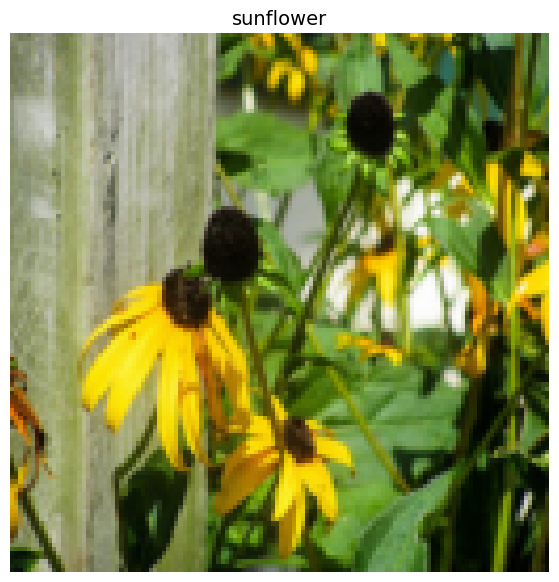

In [ ]:
# Rearranging the order of dimensions
print(img)
img_permute = img.permute(1, 2, 0)

# Printing out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plotting the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [ ]:
batch_size=32
#Creating train and test dataloaders
train_dataloader = DataLoader(train_data, batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x17485505000>,
 <torch.utils.data.dataloader.DataLoader at 0x174854a3490>)

In [ ]:
# Creating the model
class FlowerClassifier(nn.Module):
    def __init__(self, input_shape: int, hidden_units1: int, hidden_units2: int, hidden_units3: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units1), nn.ReLU(),
            nn.Linear(in_features=hidden_units1, out_features=hidden_units2), nn.ReLU(),
            nn.Linear(in_features=hidden_units2, out_features=hidden_units3), nn.ReLU(),
            nn.Linear(in_features=hidden_units3, out_features=output_shape),  nn.ReLU(),
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FlowerClassifier(input_shape=128*128*3, # number of input features
    hidden_units1=1024,
    hidden_units2=516,
    hidden_units3=256,
    output_shape=len(class_names) # number of output classes desired
).to(device) # sending model to GPU if it's available
next(model_1.parameters()).device # checking model device

device(type='cpu')

In [42]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [43]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)


In [ ]:
# Defining a function to evaluate our model
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}


In [ ]:
#Defining a function to train our model
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    return train_loss, train_acc
    
#Defining a function to test our model
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
        return test_loss, test_acc

In [46]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
trainloss=[]
testloss=[]
trainacc=[]
testacc=[]

epochs = 12
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    a,b=train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    c,d=test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )
    trainloss+=[a]
    trainacc+=[b]
    testloss+=[c]
    testacc+=[d]
def print_train_time(start, end, device):
    total_time = end - start
    print(f"Training on {device} took {total_time:.3f} seconds.")
    return total_time
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.58331 | Train accuracy: 30.55%


  8%|▊         | 1/12 [00:26<04:55, 26.88s/it]

Test loss: 1.54755 | Test accuracy: 35.19%

Epoch: 1
---------
Train loss: 1.50574 | Train accuracy: 37.49%


 17%|█▋        | 2/12 [00:53<04:26, 26.66s/it]

Test loss: 1.47874 | Test accuracy: 37.62%

Epoch: 2
---------
Train loss: 1.44320 | Train accuracy: 39.25%


 25%|██▌       | 3/12 [01:19<03:59, 26.63s/it]

Test loss: 1.40772 | Test accuracy: 41.78%

Epoch: 3
---------
Train loss: 1.41179 | Train accuracy: 40.39%


 33%|███▎      | 4/12 [01:47<03:35, 26.91s/it]

Test loss: 1.37913 | Test accuracy: 43.87%

Epoch: 4
---------
Train loss: 1.38258 | Train accuracy: 41.39%


 42%|████▏     | 5/12 [02:15<03:10, 27.20s/it]

Test loss: 1.35808 | Test accuracy: 44.91%

Epoch: 5
---------
Train loss: 1.36837 | Train accuracy: 42.74%


 50%|█████     | 6/12 [02:46<02:52, 28.70s/it]

Test loss: 1.40397 | Test accuracy: 39.70%

Epoch: 6
---------
Train loss: 1.36377 | Train accuracy: 43.44%


 58%|█████▊    | 7/12 [03:27<02:42, 32.55s/it]

Test loss: 1.34896 | Test accuracy: 44.33%

Epoch: 7
---------
Train loss: 1.34765 | Train accuracy: 44.04%


 67%|██████▋   | 8/12 [04:08<02:20, 35.22s/it]

Test loss: 1.34420 | Test accuracy: 44.56%

Epoch: 8
---------
Train loss: 1.33517 | Train accuracy: 44.82%


 75%|███████▌  | 9/12 [04:40<01:42, 34.30s/it]

Test loss: 1.37700 | Test accuracy: 41.90%

Epoch: 9
---------
Train loss: 1.32915 | Train accuracy: 44.45%


 83%|████████▎ | 10/12 [05:16<01:09, 34.76s/it]

Test loss: 1.35232 | Test accuracy: 42.82%

Epoch: 10
---------
Train loss: 1.32081 | Train accuracy: 45.57%


 92%|█████████▏| 11/12 [05:51<00:34, 34.85s/it]

Test loss: 1.34331 | Test accuracy: 44.10%

Epoch: 11
---------
Train loss: 1.30946 | Train accuracy: 47.23%


100%|██████████| 12/12 [06:21<00:00, 31.77s/it]

Test loss: 1.32187 | Test accuracy: 45.60%

Training on cpu took 381.217 seconds.


In [47]:
torch.manual_seed(42)
model_1_results = eval_model(model=model_1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
model_1_results 

{'model_name': 'FlowerClassifier',
 'model_loss': 1.3214774131774902,
 'model_acc': 45.833333333333336}

In [ ]:
#Getting a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

#Getting a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

#Performing a forward pass on a single image
model_1.eval()
with torch.inference_mode():
    pred = model_1(img_single.to(device))
    
#Printing out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 128, 128])

Output logits:
tensor([[2.9584, 3.9026, 0.0000, 0.2785, 0.4688]])

Output prediction probabilities:
tensor([[0.2650, 0.6811, 0.0138, 0.0182, 0.0220]])

Output prediction label:
tensor([1])

Actual label:
0


In [ ]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_1.eval()
with torch.inference_mode():
    pred = model_1(img_single.to(device))
    
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 128, 128])

Output logits:
tensor([[2.7155, 2.1699, 0.0000, 0.0000, 0.2394]])

Output prediction probabilities:
tensor([[0.5568, 0.3227, 0.0368, 0.0368, 0.0468]])

Output prediction label:
tensor([0])

Actual label:
0


In [ ]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_1.eval()
with torch.inference_mode():
    pred = model_1(img_single.to(device))
    
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 128, 128])

Output logits:
tensor([[1.5880, 2.9182, 0.0000, 2.5386, 0.7515]])

Output prediction probabilities:
tensor([[0.1249, 0.4723, 0.0255, 0.3231, 0.0541]])

Output prediction label:
tensor([1])

Actual label:
1


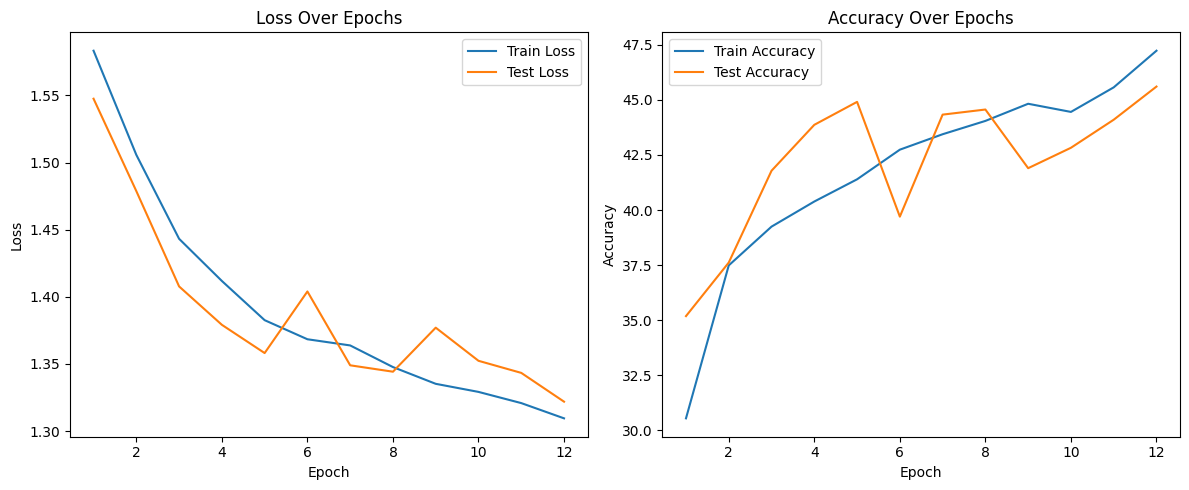

In [ ]:
import matplotlib.pyplot as plt
import torch

# Converting tensors to lists if they are still tensors
train_loss = [t.item() if isinstance(t, torch.Tensor) else t for t in trainloss]
test_loss = [t.item() if isinstance(t, torch.Tensor) else t for t in testloss]
train_accuracy = [t.item() if isinstance(t, torch.Tensor) else t for t in trainacc]
test_accuracy = [t.item() if isinstance(t, torch.Tensor) else t for t in testacc]

epochs_range= range(1, epochs+1)
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Train Loss')
plt.plot(epochs_range, test_loss, label='Test Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, label='Train Accuracy')
plt.plot(epochs_range, test_accuracy, label='Test Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


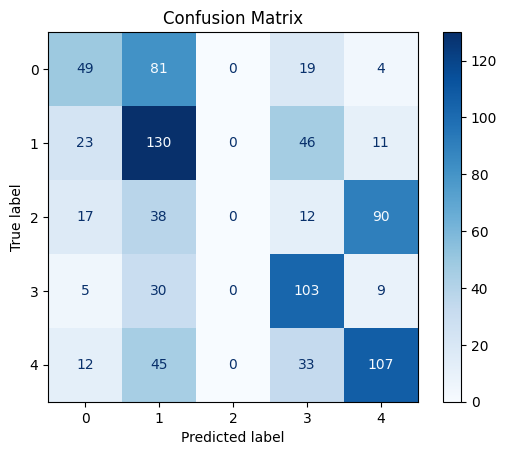

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Ensure model is in evaluation mode
model_1.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model_1(images.to(device))
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
